In [45]:
#Classification Stock Prices  with Keras LTSM Network

from pandas import read_csv
from pandas import datetime
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import library as mio
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import neighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, matthews_corrcoef
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression



In [46]:
# reduced list only the most correlated
indices_list_Complete = ["SPY","^IXIC", "^DJI", "^GDAXI", "^FTSE","^FCHI", "^N225","^HSI", "^AXJO","ORB", "EUR","AUD","GBP","JPY", "SILVER", "GOLD", "WT1010"] # reduced list only the most correlated
indice_target=["^GSPC"]

In [47]:
start_date = "2009-01-01" # Start day of Series
end_date = "2017-01-01"	  # Final day of series
dates = pd.date_range(start_date, end_date)  # date range as index

In [48]:
df_index = mio.get_data(indices_list_Complete, dates)
df_target= mio.get_data(indice_target, dates)

In [49]:
df_index.fillna(method='bfill', inplace=True)
df_target.fillna(method='bfill', inplace=True)

In [50]:
df_index.tail()

,SPY,^IXIC,^DJI,^GDAXI,^FTSE,^FCHI,^N225,^HSI,^AXJO,ORB,EUR,AUD,GBP,JPY,SILVER,GOLD,WT1010
2016-12-23,224.732324,5462.689941,19933.810547,11449.929688,7068.200195,4839.680176,19403.060547,21574.759766,5627.899902,51.74,0.957179,1.394655,0.814821,117.185667,15.74,1131.00,0.25
2016-12-27,225.289896,5487.439941,19945.039062,11472.240234,7106.100098,4848.279785,19403.060547,21754.740234,5685.000000,52.25,0.956361,1.391288,0.815262,117.457200,15.85,1139.75,0.21
2016-12-28,223.427985,5438.560059,19833.679688,11474.990234,7106.100098,4848.009766,19401.720703,21754.740234,5685.000000,53.39,0.963017,1.393879,0.817868,117.543337,15.85,1139.75,0.19
2016-12-29,223.378214,5432.089844,19819.779297,11451.049805,7120.299805,4838.470215,19145.140625,21790.910156,5699.100098,53.46,0.954902,1.387659,0.817942,116.505533,16.06,1146.80,0.17
2016-12-30,222.561759,5383.120117,19762.599609,11481.059570,7142.799805,4862.310059,19114.369141,22000.560547,5665.799805,53.30,0.948191,1.385629,0.810056,116.637500,16.24,1159.10,0.19


In [51]:
colums_1=df_index.columns

In [52]:
for index in colums_1:
    df_index[index+'_Ret'] = df_index[index].pct_change(1)
    df_index.drop(index,axis=1, inplace=True)

In [53]:
df_index.replace([np.inf, -np.inf], np.nan)
df_index[df_index==np.inf] = np.nan
df_index[df_index==-np.inf] = np.nan
df_index.fillna(method='bfill', inplace=True)

In [54]:
df_index.tail()

,SPY_Ret,^IXIC_Ret,^DJI_Ret,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,EUR_Ret,AUD_Ret,GBP_Ret,JPY_Ret,SILVER_Ret,GOLD_Ret,WT1010_Ret
2016-12-23,0.001464,0.002803,0.000750,-0.000539,0.000637,0.001045,-0.001267,-0.002840,-0.002835,0.000193,-0.000564,0.005159,0.002310,-0.003371,-0.001902,0.000398,0.000000
2016-12-27,0.002481,0.004531,0.000563,0.001949,0.005362,0.001777,0.000000,0.008342,0.010146,0.009857,-0.000855,-0.002414,0.000541,0.002317,0.006989,0.007737,-0.160000
2016-12-28,-0.008265,-0.008908,-0.005583,0.000240,0.000000,-0.000056,-0.000069,0.000000,0.000000,0.021818,0.006960,0.001862,0.003197,0.000733,0.000000,0.000000,-0.095238
2016-12-29,-0.000223,-0.001190,-0.000701,-0.002086,0.001998,-0.001968,-0.013225,0.001663,0.002480,0.001311,-0.008427,-0.004462,0.000090,-0.008829,0.013249,0.006186,-0.105263
2016-12-30,-0.003655,-0.009015,-0.002885,0.002621,0.003160,0.004927,-0.001607,0.009621,-0.005843,-0.002993,-0.007028,-0.001463,-0.009641,0.001133,0.011208,0.010725,0.117647


In [55]:
df_index.columns

Index(['SPY_Ret', '^IXIC_Ret', '^DJI_Ret', '^GDAXI_Ret', '^FTSE_Ret',
       '^FCHI_Ret', '^N225_Ret', '^HSI_Ret', '^AXJO_Ret', 'ORB_Ret', 'EUR_Ret',
       'AUD_Ret', 'GBP_Ret', 'JPY_Ret', 'SILVER_Ret', 'GOLD_Ret',
       'WT1010_Ret'],
      dtype='object')

In [56]:
def shift_minus(df, list_s, n):
    for symbol in list_s:
        M = pd.Series(df[symbol].shift(-1), name = str(symbol)+"-" + str(n))
        df=df.join(M)
    return df

In [57]:
colums_1=['SPY_Ret', '^IXIC_Ret', '^DJI_Ret']

In [58]:
df_target_2=shift_minus(df_index, colums_1,1)

In [59]:
df_target_2.tail()

,SPY_Ret,^IXIC_Ret,^DJI_Ret,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,EUR_Ret,AUD_Ret,GBP_Ret,JPY_Ret,SILVER_Ret,GOLD_Ret,WT1010_Ret,SPY_Ret-1,^IXIC_Ret-1,^DJI_Ret-1
2016-12-23,0.001464,0.002803,0.000750,-0.000539,0.000637,0.001045,-0.001267,-0.002840,-0.002835,0.000193,-0.000564,0.005159,0.002310,-0.003371,-0.001902,0.000398,0.000000,0.002481,0.004531,0.000563
2016-12-27,0.002481,0.004531,0.000563,0.001949,0.005362,0.001777,0.000000,0.008342,0.010146,0.009857,-0.000855,-0.002414,0.000541,0.002317,0.006989,0.007737,-0.160000,-0.008265,-0.008908,-0.005583
2016-12-28,-0.008265,-0.008908,-0.005583,0.000240,0.000000,-0.000056,-0.000069,0.000000,0.000000,0.021818,0.006960,0.001862,0.003197,0.000733,0.000000,0.000000,-0.095238,-0.000223,-0.001190,-0.000701
2016-12-29,-0.000223,-0.001190,-0.000701,-0.002086,0.001998,-0.001968,-0.013225,0.001663,0.002480,0.001311,-0.008427,-0.004462,0.000090,-0.008829,0.013249,0.006186,-0.105263,-0.003655,-0.009015,-0.002885
2016-12-30,-0.003655,-0.009015,-0.002885,0.002621,0.003160,0.004927,-0.001607,0.009621,-0.005843,-0.002993,-0.007028,-0.001463,-0.009641,0.001133,0.011208,0.010725,0.117647,NaN,NaN,NaN


In [60]:
def del_col(df, list_s, n):
    for symbol in list_s:
        df.drop(symbol,axis=1,inplace=True)
    return df

In [61]:
df_target_3=del_col(df_target_2,colums_1,1)

In [62]:
df_target_3.tail()

,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,EUR_Ret,AUD_Ret,GBP_Ret,JPY_Ret,SILVER_Ret,GOLD_Ret,WT1010_Ret,SPY_Ret-1,^IXIC_Ret-1,^DJI_Ret-1
2016-12-23,-0.000539,0.000637,0.001045,-0.001267,-0.002840,-0.002835,0.000193,-0.000564,0.005159,0.002310,-0.003371,-0.001902,0.000398,0.000000,0.002481,0.004531,0.000563
2016-12-27,0.001949,0.005362,0.001777,0.000000,0.008342,0.010146,0.009857,-0.000855,-0.002414,0.000541,0.002317,0.006989,0.007737,-0.160000,-0.008265,-0.008908,-0.005583
2016-12-28,0.000240,0.000000,-0.000056,-0.000069,0.000000,0.000000,0.021818,0.006960,0.001862,0.003197,0.000733,0.000000,0.000000,-0.095238,-0.000223,-0.001190,-0.000701
2016-12-29,-0.002086,0.001998,-0.001968,-0.013225,0.001663,0.002480,0.001311,-0.008427,-0.004462,0.000090,-0.008829,0.013249,0.006186,-0.105263,-0.003655,-0.009015,-0.002885
2016-12-30,0.002621,0.003160,0.004927,-0.001607,0.009621,-0.005843,-0.002993,-0.007028,-0.001463,-0.009641,0.001133,0.011208,0.010725,0.117647,NaN,NaN,NaN


In [63]:
colums_2=df_target.columns

In [64]:
for index in colums_2:
    df_target[index+'_Ret'] = df_target[index].pct_change(1)
    df_target.drop(index,axis=1, inplace=True)

In [65]:
df_target.replace([np.inf, -np.inf], np.nan)
df_target[df_target==np.inf] = np.nan
df_target[df_target==-np.inf] = np.nan
df_target.fillna(method='bfill', inplace=True)

In [66]:
df_target.describe()

,^GSPC_Ret
count,2014.000000
mean,0.000493
std,0.010965
min,-0.066634
25%,-0.004069
50%,0.000611
75%,0.005642
max,0.070758


In [67]:
df_final = df_target_3.join(df_target)


In [68]:
df_final=df_final[:-1]

In [69]:
df_final.head()

,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,EUR_Ret,AUD_Ret,GBP_Ret,JPY_Ret,SILVER_Ret,GOLD_Ret,WT1010_Ret,SPY_Ret-1,^IXIC_Ret-1,^DJI_Ret-1,^GSPC_Ret
2009-01-02,0.002196,0.003902,0.003054,0.000000,0.034601,-0.007216,0.087537,0.021902,-0.010359,-0.009980,0.018139,-0.000903,-0.011210,0.016835,-0.001183,-0.002561,-0.009054,-0.004668
2009-01-05,0.002196,0.003902,0.003054,0.000000,0.034601,-0.007216,0.087537,0.021902,-0.010359,-0.009980,0.018139,-0.000903,-0.011210,0.016835,0.006677,0.014957,0.006949,-0.004668
2009-01-06,0.008491,0.012949,0.010804,0.004171,-0.003457,0.015107,0.053206,0.009150,-0.008865,-0.009591,0.009901,-0.019874,-0.018605,0.009934,-0.029956,-0.032269,-0.027221,0.007817
2009-01-07,-0.017675,-0.028326,-0.014760,0.017443,-0.033660,0.009886,-0.019214,-0.013482,0.000796,-0.024127,-0.013729,0.051613,0.023697,0.026230,0.004081,0.011225,-0.003106,-0.030010
2009-01-08,-0.011658,-0.000466,-0.006503,-0.039269,-0.038135,-0.022594,-0.074180,-0.003900,0.015097,-0.006973,-0.017088,-0.046450,-0.024884,0.028754,-0.021419,-0.028089,-0.016389,0.003397


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

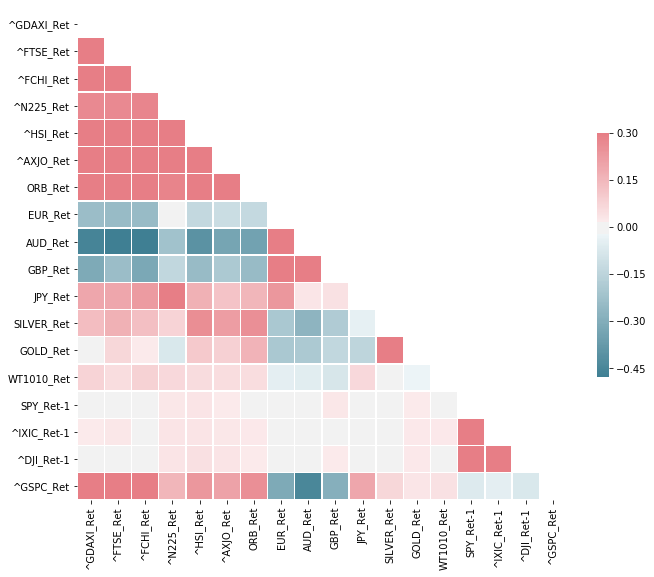

In [71]:
corr = df_final.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [72]:
def Label_Change2 (x):
    if x >= 0 :
        return 1

    return 0

In [73]:
#df_final=df_final.applymap(Label_Change2)

In [74]:
df_final.tail()

,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,EUR_Ret,AUD_Ret,GBP_Ret,JPY_Ret,SILVER_Ret,GOLD_Ret,WT1010_Ret,SPY_Ret-1,^IXIC_Ret-1,^DJI_Ret-1,^GSPC_Ret
2016-12-22,-0.001093,0.003167,0.000168,-0.000865,-0.007960,0.005415,-0.009952,-0.001324,0.005745,0.004228,-0.000074,-0.016220,-0.003394,0.041667,0.001464,0.002803,0.000750,-0.001863
2016-12-23,-0.000539,0.000637,0.001045,-0.001267,-0.002840,-0.002835,0.000193,-0.000564,0.005159,0.002310,-0.003371,-0.001902,0.000398,0.000000,0.002481,0.004531,0.000563,0.001252
2016-12-27,0.001949,0.005362,0.001777,0.000000,0.008342,0.010146,0.009857,-0.000855,-0.002414,0.000541,0.002317,0.006989,0.007737,-0.160000,-0.008265,-0.008908,-0.005583,0.002248
2016-12-28,0.000240,0.000000,-0.000056,-0.000069,0.000000,0.000000,0.021818,0.006960,0.001862,0.003197,0.000733,0.000000,0.000000,-0.095238,-0.000223,-0.001190,-0.000701,-0.008357
2016-12-29,-0.002086,0.001998,-0.001968,-0.013225,0.001663,0.002480,0.001311,-0.008427,-0.004462,0.000090,-0.008829,0.013249,0.006186,-0.105263,-0.003655,-0.009015,-0.002885,-0.000293


In [75]:
df_final['^GSPC_final']=np.where(df_final['^GSPC_Ret']>=0, 1, 0)

In [76]:
df_final.drop('^GSPC_Ret',axis=1,inplace=True)

In [77]:
df_final.columns

Index(['^GDAXI_Ret', '^FTSE_Ret', '^FCHI_Ret', '^N225_Ret', '^HSI_Ret',
       '^AXJO_Ret', 'ORB_Ret', 'EUR_Ret', 'AUD_Ret', 'GBP_Ret', 'JPY_Ret',
       'SILVER_Ret', 'GOLD_Ret', 'WT1010_Ret', 'SPY_Ret-1', '^IXIC_Ret-1',
       '^DJI_Ret-1', '^GSPC_final'],
      dtype='object')

In [78]:
df_final=df_final[['^GDAXI_Ret', '^FTSE_Ret', '^FCHI_Ret', '^N225_Ret', '^HSI_Ret',
       '^AXJO_Ret', 'ORB_Ret', 'JPY_Ret', 'WT1010_Ret','^GSPC_final']]

In [79]:
df_final.head()

,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,JPY_Ret,WT1010_Ret,^GSPC_final
2009-01-02,0.002196,0.003902,0.003054,0.000000,0.034601,-0.007216,0.087537,0.018139,0.016835,0
2009-01-05,0.002196,0.003902,0.003054,0.000000,0.034601,-0.007216,0.087537,0.018139,0.016835,0
2009-01-06,0.008491,0.012949,0.010804,0.004171,-0.003457,0.015107,0.053206,0.009901,0.009934,1
2009-01-07,-0.017675,-0.028326,-0.014760,0.017443,-0.033660,0.009886,-0.019214,-0.013729,0.026230,0
2009-01-08,-0.011658,-0.000466,-0.006503,-0.039269,-0.038135,-0.022594,-0.074180,-0.017088,0.028754,1


In [80]:

columns=df_final.columns

In [81]:
values = df_final.values
train_size = int(len(values) * 0.70)
train, test = values[0:train_size], values[train_size:len(values)]
print('Observations: %d' % (len(values)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2013
Training Observations: 1409
Testing Observations: 604


In [82]:
df_test=df_final[train_size:len(values)]

In [83]:
indexs=df_test.index

In [84]:
indexs

DatetimeIndex(['2014-08-08', '2014-08-11', '2014-08-12', '2014-08-13',
               '2014-08-14', '2014-08-15', '2014-08-18', '2014-08-19',
               '2014-08-20', '2014-08-21',
               ...
               '2016-12-15', '2016-12-16', '2016-12-19', '2016-12-20',
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-27',
               '2016-12-28', '2016-12-29'],
              dtype='datetime64[ns]', length=604, freq=None)

In [85]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]



In [86]:
test_y

array([1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1.

In [87]:
#train_XS = train_XS.reshape((train_XS.shape[0], 1, train_XS.shape[1]))
#test_XS = test_XS.reshape((test_XS.shape[0], 1, test_XS.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1409, 9) (1409,) (604, 9) (604,)


In [90]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [117]:
clf1 =GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=40, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
print("Gradient Tree Boosting Classification")

Gradient Tree Boosting Classification


In [118]:
clf1.fit(train_X, train_y)
accuracy = clf1.score(test_X, test_y)
y_test_pred = clf1.predict(test_X)
Sscore = f1_score(test_y, y_test_pred)
print(pretty_confusion_matrix(test_y, y_test_pred, labels=['UP', 'Down']))
print("\n")
print(classification_report(test_y, y_test_pred))
print("Accuracy: {}\nF1_score: {}".format(accuracy,Sscore))

      Predicted UP  Predicted Down
UP             173             124
Down            64             243


             precision    recall  f1-score   support

        0.0       0.73      0.58      0.65       297
        1.0       0.66      0.79      0.72       307

avg / total       0.70      0.69      0.69       604

Accuracy: 0.6887417218543046
F1_score: 0.7210682492581603


In [96]:
accu=make_scorer(accuracy_score)

In [97]:
param_test1 = {'n_estimators':[20,40,50,60,70,80,90,100,150,200],'learning_rate':[0.1,0.2], 'min_samples_split':[100,200,300],'min_samples_leaf':[10,30,40, 50, 75],'max_features':['auto', 'sqrt']} 
clf2 = GridSearchCV(GradientBoostingClassifier(), param_grid = param_test1, scoring=accu,n_jobs=1,iid=False, cv=5, verbose=100)
clf2.fit(train_X, train_y)
df1=pd.DataFrame(clf2.grid_scores_)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=20 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=20, score=0.681979 -   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=20 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=20, score=0.696113 -   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=20 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=20, score=0.793594 -   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=80, score=0.800712 -   0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.9s remaining:    0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=80 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=80, score=0.679715 -   0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    2.0s remaining:    0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=80 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=80, score=0.711744 -   0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.1s remaining:    0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=40, score=0.692580 -   0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    5.6s remaining:    0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=40, score=0.800712 -   0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    5.7s remaining:    0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=40, score=0.701068 -   0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    5.7s remaining:    0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=90, score=0.690391 -   0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    7.8s remaining:    0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=90, score=0.704626 -   0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    7.9s remaining:    0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100, score=0.713781 -   0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    8.0s remaining:    0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=auto, min_samples_le

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=60, score=0.706714 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=60, score=0.685512 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=60, score=0.800712 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=60, score=0.697509 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=10, min

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40, score=0.696113 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40, score=0.797153 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40, score=0.701068 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40, score=0.718861 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=150, score=0.669039 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=150 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=150, score=0.708185 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=200, score=0.720848 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=200, score=0.671378 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=80, score=0.715302 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.703180 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.681979 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.800712 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=60, score=0.692580 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=60, score=0.696113 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=60, score=0.807829 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=60, score=0.693950 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=30, min

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40, score=0.692580 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40, score=0.807829 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40, score=0.701068 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40, score=0.711744 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=150, score=0.683274 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=150 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=150, score=0.693950 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=200, score=0.710247 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=200, score=0.671378 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90, score=0.703180 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90, score=0.678445 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90, score=0.779359 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90, score=0.690391 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=60, score=0.736655 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=70, score=0.689046 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=70, score=0.689046 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=70, score=0.793594 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=40, min

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.696113 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.804270 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.697509 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.697509 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=0.679715 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=0.729537 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=200, score=0.692580 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=200, score=0.685512 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.671378 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.800712 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.683274 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.725979 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, mi

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=60, score=0.729537 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=70, score=0.696113 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=70, score=0.685512 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=70, score=0.782918 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=50, min

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=40, score=0.696113 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=40, score=0.786477 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=40, score=0.690391 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=40, score=0.718861 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=150, score=0.782918 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=150 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=150, score=0.690391 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=150 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=150, score=0.711744 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=200, score=0.699647 -   0.1s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=80, score=0.683274 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=80 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=80, score=0.733096 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90, score=0.696113 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90, score=0.678445 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min

[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=60, score=0.689046 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=60, score=0.699647 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=60, score=0.782918 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=60, score=0.701068 -   0.0s
[CV] learning_rate=0.1, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.1, max_features=auto, min_samples_leaf=75, min

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=40, score=0.790036 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=40, score=0.715302 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=40, score=0.718861 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=50, score=0.696113 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=150, score=0.693950 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=150 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=150, score=0.722420 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200, score=0.717314 -   0.1s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200, score=0.685512 -   0.1s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90, score=0.710247 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90, score=0.790036 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90, score=0.690391 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90, score=0.736655 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, mi

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70, score=0.699647 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70, score=0.793594 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70, score=0.704626 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70, score=0.718861 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=80 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=10, min

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=40, score=0.729537 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=50, score=0.696113 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=50, score=0.692580 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=50, score=0.786477 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200, score=0.653710 -   0.1s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200, score=0.765125 -   0.1s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200, score=0.697509 -   0.1s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200, score=0.708185 -   0.1s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=20 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.790036 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.683274 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.736655 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=100, score=0.689046 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, 

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=60, score=0.729537 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70, score=0.692580 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70, score=0.696113 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70, score=0.786477 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=30, min

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50, score=0.689046 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50, score=0.703180 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50, score=0.786477 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50, score=0.722420 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=200, score=0.772242 -   0.1s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=200, score=0.665480 -   0.1s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=200, score=0.708185 -   0.1s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=20 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=20, score=0.703180 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=20 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=90, score=0.718861 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.692580 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.703180 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.797153 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70, score=0.706714 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70, score=0.786477 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70, score=0.711744 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70, score=0.733096 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=80 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=40, min

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.782918 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.715302 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.715302 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=0.678445 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=0.704626 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=0.733096 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=200, score=0.713781 -   0.1s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=200, score=0.678445 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.689046 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.779359 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.679715 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.740214 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, mi

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70, score=0.703180 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70, score=0.797153 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70, score=0.711744 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70, score=0.729537 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=80 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=50, min

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50, score=0.674912 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50, score=0.699647 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50, score=0.768683 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50, score=0.704626 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=200, score=0.782918 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=200, score=0.672598 -   0.1s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=200, score=0.736655 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=20 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=20, score=0.703180 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=20 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=100, score=0.699647 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=100, score=0.786477 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=100, score=0.679715 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=100, score=0.754448 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=150 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf

[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=70, score=0.718861 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=70, score=0.743772 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=80 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=80, score=0.681979 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=80 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=80, score=0.710247 -   0.0s
[CV] learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=80 
[CV]  learning_rate=0.1, max_features=sqrt, min_samples_leaf=75, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=50, score=0.699647 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=50, score=0.699647 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=50, score=0.779359 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=50, score=0.686833 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200, score=0.671378 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200, score=0.758007 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200, score=0.683274 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200, score=0.697509 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=20 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=90, score=0.679715 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=90, score=0.693950 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100, score=0.713781 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100, score=0.696113 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=60, score=0.690391 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=70, score=0.703180 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=70, score=0.713781 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=70, score=0.790036 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=10, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40, score=0.646643 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40, score=0.782918 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40, score=0.672598 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=40, score=0.711744 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=150, score=0.679715 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=150 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=150, score=0.676157 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=200, score=0.699647 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=200, score=0.660777 -   0.2s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.706714 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.671378 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.772242 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.676157 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=60, score=0.718861 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=70, score=0.731449 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=70, score=0.685512 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=70, score=0.793594 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=30, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40, score=0.685512 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40, score=0.790036 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40, score=0.690391 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=40, score=0.718861 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=150, score=0.665480 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=150 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=150, score=0.651246 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=200, score=0.731449 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=200, score=0.685512 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90, score=0.703180 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90, score=0.678445 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90, score=0.772242 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90, score=0.651246 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=60, score=0.679715 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=60, score=0.697509 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=70, score=0.710247 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=70, score=0.671378 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=40, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.678445 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.772242 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.669039 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.711744 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=0.775801 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=0.693950 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=150 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=0.669039 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=200, score=0.685512 -   0.2s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=80, score=0.690391 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.717314 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.667845 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.782918 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=60, score=0.696113 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=60, score=0.696113 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=60, score=0.779359 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=60, score=0.690391 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=60 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=50, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=40, score=0.779359 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=40, score=0.686833 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=40, score=0.725979 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=50, score=0.689046 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=150, score=0.686833 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=200, score=0.706714 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=200, score=0.667845 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=200, score=0.779359 -   0.1s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90, score=0.689046 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90, score=0.667845 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90, score=0.775801 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90, score=0.672598 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min

[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=60, score=0.736655 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=70, score=0.681979 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=70, score=0.699647 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=70, score=0.811388 -   0.0s
[CV] learning_rate=0.2, max_features=auto, min_samples_leaf=75, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=auto, min_samples_leaf=75, min

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=40, score=0.697509 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=40, score=0.715302 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=50, score=0.713781 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=50, score=0.696113 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=150, score=0.693950 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200, score=0.713781 -   0.1s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200, score=0.678445 -   0.1s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200, score=0.754448 -   0.1s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90, score=0.696113 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90, score=0.685512 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90, score=0.779359 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90, score=0.693950 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=60, score=0.718861 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70, score=0.706714 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70, score=0.710247 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70, score=0.772242 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=10, min

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=40, score=0.697509 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=40, score=0.711744 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=50, score=0.696113 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=50, score=0.689046 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=150, score=0.701068 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200, score=0.706714 -   0.1s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200, score=0.678445 -   0.1s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200, score=0.761566 -   0.1s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.779359 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.669039 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=90, score=0.704626 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=100, score=0.699647 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, 

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=60, score=0.736655 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70, score=0.706714 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70, score=0.681979 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70, score=0.775801 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=30, min

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50, score=0.696113 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50, score=0.696113 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50, score=0.768683 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50, score=0.676157 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=200, score=0.664311 -   0.1s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=200, score=0.775801 -   0.1s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=200, score=0.676157 -   0.1s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=200, score=0.647687 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=20 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=90, score=0.779359 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=90, score=0.672598 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=90, score=0.697509 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.699647 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, 

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=60, score=0.711744 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70, score=0.699647 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70, score=0.667845 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70, score=0.786477 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=40, min

[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.697509 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score=0.729537 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=0.699647 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=50, score=0.678445 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=150, score=0.725979 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=200, score=0.696113 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=200, score=0.667845 -   0.1s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=200, score=0.772242 -   0.1s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.775801 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.690391 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=90, score=0.733096 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=100, score=0.696113 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, 

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=60, score=0.729537 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70, score=0.685512 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70, score=0.685512 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70, score=0.779359 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=50, min

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=40, score=0.708185 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=40 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=40, score=0.729537 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50, score=0.692580 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50, score=0.696113 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=50 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=150, score=0.704626 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=200, score=0.685512 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=200, score=0.657244 -   0.1s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=200, score=0.786477 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=100, n_estimators=200 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=90, score=0.692580 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=90, score=0.775801 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=90, score=0.676157 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=90 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=90, score=0.733096 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=200, n_estimators=100 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, mi

[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=70, score=0.685512 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=70, score=0.696113 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=70, score=0.790036 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=70, score=0.693950 -   0.0s
[CV] learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min_samples_split=300, n_estimators=70 
[CV]  learning_rate=0.2, max_features=sqrt, min_samples_leaf=75, min

In [99]:
clf2.best_params_

{'learning_rate': 0.1,
 'max_features': 'sqrt',
 'min_samples_leaf': 40,
 'min_samples_split': 300,
 'n_estimators': 50}

In [101]:
clf2.best_score_

0.733224350187996

In [116]:
clf2.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=40, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

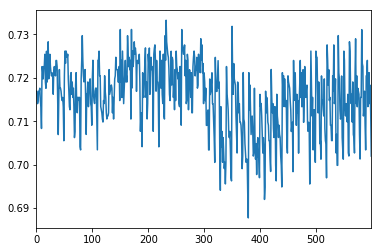

In [104]:
df1['mean_validation_score'].plot()

In [114]:
clf3 = SVC(C=3000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
print("SVM binary Classification")

SVM binary Classification


In [115]:
clf3.fit(train_X, train_y)
accuracy = clf3.score(test_X, test_y)
y_test_pred = clf3.predict(test_X)
Sscore = f1_score(test_y, y_test_pred)
print(pretty_confusion_matrix(test_y, y_test_pred, labels=['UP', 'Down']))
print(classification_report(test_y, y_test_pred))
print("Accuracy: {}\nF1_score: {}".format(accuracy,Sscore))

      Predicted UP  Predicted Down
UP             150             147
Down            56             251
             precision    recall  f1-score   support

        0.0       0.73      0.51      0.60       297
        1.0       0.63      0.82      0.71       307

avg / total       0.68      0.66      0.66       604

Accuracy: 0.6639072847682119
F1_score: 0.7120567375886525


In [110]:
params_map = [{ 'C': [0.001,0.005, 0.01,0.02, 0.1,0.4, 0.5,0.6,0.7, 1.0, 2.0, 5.0, 10.0, 100.0],'kernel': ['rbf'],'gamma': ['auto',0.001,0.01, 0.05,0.1, 0.5, 1.0,4.0, 5.0, 6.0, 10.0,50.0,100.0,150.0]},
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000, 1500, 2000, 2500,3000, 3500,4000]},
    #{'kernel': ['poly'], 'C': [1, 10, 100, 1000, 1500, 2000, 2500,3000, 3500,4000],'degree':[2,3,4,5,6,7,8,9,10,15], 'gamma': ['auto',0.001,0.01, 0.05,0.1, 0.5, 1.0, 5.0]},
    {'kernel': ['sigmoid'], 'C': [1, 10, 100, 1000, 1500, 2000, 2500,3000, 3500,4000], 'gamma': ['auto',0.001,0.01, 0.05,0.1, 0.5, 1.0, 5.0]}]


clf5 = GridSearchCV(SVC(), params_map, scoring=accu, verbose=100)
clf5.fit(train_X, train_y)
df4=pd.DataFrame(clf5.grid_scores_)


Fitting 3 folds for each of 286 candidates, totalling 858 fits
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV] ........ C=0.001, gamma=auto, kernel=rbf, score=0.558386 -   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV] ........ C=0.001, gamma=auto, kernel=rbf, score=0.558635 -   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV] ........ C=0.001, gamma=auto, kernel=rbf, score=0.558635 -   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ....... C=0.001, gamma=0.001, kernel=rbf, score=0.558386 -   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ...........

[CV] ....... C=0.001, gamma=150.0, kernel=rbf, score=0.558635 -   0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.5s remaining:    0.0s
[CV] C=0.001, gamma=150.0, kernel=rbf ................................
[CV] ....... C=0.001, gamma=150.0, kernel=rbf, score=0.558635 -   0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.6s remaining:    0.0s
[CV] C=0.005, gamma=auto, kernel=rbf .................................
[CV] ........ C=0.005, gamma=auto, kernel=rbf, score=0.558386 -   0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.6s remaining:    0.0s
[CV] C=0.005, gamma=auto, kernel=rbf .................................
[CV] ........ C=0.005, gamma=auto, kernel=rbf, score=0.558635 -   0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.7s remaining:    0.0s
[CV] C=0.005, gamma=auto, kernel=rbf .................................
[CV] ........ C=0.005, gamma=auto, kernel=rbf, score=0.558635 -   0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45

[CV] ....... C=0.005, gamma=150.0, kernel=rbf, score=0.558635 -   0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    3.2s remaining:    0.0s
[CV] C=0.005, gamma=150.0, kernel=rbf ................................
[CV] ....... C=0.005, gamma=150.0, kernel=rbf, score=0.558635 -   0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.3s remaining:    0.0s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV] ......... C=0.01, gamma=auto, kernel=rbf, score=0.558386 -   0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.3s remaining:    0.0s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV] ......... C=0.01, gamma=auto, kernel=rbf, score=0.558635 -   0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    3.3s remaining:    0.0s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV] ......... C=0.01, gamma=auto, kernel=rbf, score=0.558635 -   0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87

[CV] ......... C=0.02, gamma=0.05, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.02, gamma=0.05, kernel=rbf ..................................
[CV] ......... C=0.02, gamma=0.05, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.02, gamma=0.1, kernel=rbf ...................................
[CV] .......... C=0.02, gamma=0.1, kernel=rbf, score=0.558386 -   0.0s
[CV] C=0.02, gamma=0.1, kernel=rbf ...................................
[CV] .......... C=0.02, gamma=0.1, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.02, gamma=0.1, kernel=rbf ...................................
[CV] .......... C=0.02, gamma=0.1, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.02, gamma=0.5, kernel=rbf ...................................
[CV] .......... C=0.02, gamma=0.5, kernel=rbf, score=0.558386 -   0.0s
[CV] C=0.02, gamma=0.5, kernel=rbf ...................................
[CV] .......... C=0.02, gamma=0.5, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.02, gamma=0.5, kernel=rbf ...................................
[CV] .

[CV] ........... C=0.1, gamma=5.0, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.1, gamma=6.0, kernel=rbf ....................................
[CV] ........... C=0.1, gamma=6.0, kernel=rbf, score=0.558386 -   0.0s
[CV] C=0.1, gamma=6.0, kernel=rbf ....................................
[CV] ........... C=0.1, gamma=6.0, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.1, gamma=6.0, kernel=rbf ....................................
[CV] ........... C=0.1, gamma=6.0, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.1, gamma=10.0, kernel=rbf ...................................
[CV] .......... C=0.1, gamma=10.0, kernel=rbf, score=0.577495 -   0.0s
[CV] C=0.1, gamma=10.0, kernel=rbf ...................................
[CV] .......... C=0.1, gamma=10.0, kernel=rbf, score=0.565032 -   0.0s
[CV] C=0.1, gamma=10.0, kernel=rbf ...................................
[CV] .......... C=0.1, gamma=10.0, kernel=rbf, score=0.571429 -   0.0s
[CV] C=0.1, gamma=50.0, kernel=rbf ...................................
[CV] .

[CV] ......... C=0.5, gamma=0.001, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=0.5, gamma=0.001, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .......... C=0.5, gamma=0.01, kernel=rbf, score=0.558386 -   0.0s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .......... C=0.5, gamma=0.01, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .......... C=0.5, gamma=0.01, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.5, gamma=0.05, kernel=rbf ...................................
[CV] .......... C=0.5, gamma=0.05, kernel=rbf, score=0.558386 -   0.0s
[CV] C=0.5, gamma=0.05, kernel=rbf ...................................
[CV] .......... C=0.5, gamma=0.05, kernel=rbf, score=0.558635 -   0.0s
[CV] C=0.5, gamma=0.05, kernel=rbf ...................................
[CV] .

[CV] ........... C=0.6, gamma=5.0, kernel=rbf, score=0.690021 -   0.0s
[CV] C=0.6, gamma=5.0, kernel=rbf ....................................
[CV] ........... C=0.6, gamma=5.0, kernel=rbf, score=0.688699 -   0.0s
[CV] C=0.6, gamma=5.0, kernel=rbf ....................................
[CV] ........... C=0.6, gamma=5.0, kernel=rbf, score=0.637527 -   0.0s
[CV] C=0.6, gamma=6.0, kernel=rbf ....................................
[CV] ........... C=0.6, gamma=6.0, kernel=rbf, score=0.698514 -   0.0s
[CV] C=0.6, gamma=6.0, kernel=rbf ....................................
[CV] ........... C=0.6, gamma=6.0, kernel=rbf, score=0.699360 -   0.0s
[CV] C=0.6, gamma=6.0, kernel=rbf ....................................
[CV] ........... C=0.6, gamma=6.0, kernel=rbf, score=0.652452 -   0.0s
[CV] C=0.6, gamma=10.0, kernel=rbf ...................................
[CV] .......... C=0.6, gamma=10.0, kernel=rbf, score=0.683652 -   0.0s
[CV] C=0.6, gamma=10.0, kernel=rbf ...................................
[CV] .

[CV] ......... C=1.0, gamma=0.001, kernel=rbf, score=0.558386 -   0.0s
[CV] C=1.0, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=1.0, gamma=0.001, kernel=rbf, score=0.558635 -   0.0s
[CV] C=1.0, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=1.0, gamma=0.001, kernel=rbf, score=0.558635 -   0.0s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] .......... C=1.0, gamma=0.01, kernel=rbf, score=0.558386 -   0.0s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] .......... C=1.0, gamma=0.01, kernel=rbf, score=0.558635 -   0.0s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] .......... C=1.0, gamma=0.01, kernel=rbf, score=0.558635 -   0.0s
[CV] C=1.0, gamma=0.05, kernel=rbf ...................................
[CV] .......... C=1.0, gamma=0.05, kernel=rbf, score=0.558386 -   0.0s
[CV] C=1.0, gamma=0.05, kernel=rbf ...................................
[CV] .

[CV] ........... C=2.0, gamma=4.0, kernel=rbf, score=0.705757 -   0.0s
[CV] C=2.0, gamma=5.0, kernel=rbf ....................................
[CV] ........... C=2.0, gamma=5.0, kernel=rbf, score=0.687898 -   0.0s
[CV] C=2.0, gamma=5.0, kernel=rbf ....................................
[CV] ........... C=2.0, gamma=5.0, kernel=rbf, score=0.754797 -   0.0s
[CV] C=2.0, gamma=5.0, kernel=rbf ....................................
[CV] ........... C=2.0, gamma=5.0, kernel=rbf, score=0.699360 -   0.0s
[CV] C=2.0, gamma=6.0, kernel=rbf ....................................
[CV] ........... C=2.0, gamma=6.0, kernel=rbf, score=0.692144 -   0.0s
[CV] C=2.0, gamma=6.0, kernel=rbf ....................................
[CV] ........... C=2.0, gamma=6.0, kernel=rbf, score=0.759062 -   0.0s
[CV] C=2.0, gamma=6.0, kernel=rbf ....................................
[CV] ........... C=2.0, gamma=6.0, kernel=rbf, score=0.703625 -   0.0s
[CV] C=2.0, gamma=10.0, kernel=rbf ...................................
[CV] .

[CV] ......... C=5.0, gamma=150.0, kernel=rbf, score=0.688699 -   0.0s
[CV] C=10.0, gamma=auto, kernel=rbf ..................................
[CV] ......... C=10.0, gamma=auto, kernel=rbf, score=0.594480 -   0.0s
[CV] C=10.0, gamma=auto, kernel=rbf ..................................
[CV] ......... C=10.0, gamma=auto, kernel=rbf, score=0.571429 -   0.0s
[CV] C=10.0, gamma=auto, kernel=rbf ..................................
[CV] ......... C=10.0, gamma=auto, kernel=rbf, score=0.573561 -   0.0s
[CV] C=10.0, gamma=0.001, kernel=rbf .................................
[CV] ........ C=10.0, gamma=0.001, kernel=rbf, score=0.558386 -   0.0s
[CV] C=10.0, gamma=0.001, kernel=rbf .................................
[CV] ........ C=10.0, gamma=0.001, kernel=rbf, score=0.558635 -   0.0s
[CV] C=10.0, gamma=0.001, kernel=rbf .................................
[CV] ........ C=10.0, gamma=0.001, kernel=rbf, score=0.558635 -   0.0s
[CV] C=10.0, gamma=0.01, kernel=rbf ..................................
[CV] .

[CV] ......... C=100.0, gamma=4.0, kernel=rbf, score=0.692144 -   0.0s
[CV] C=100.0, gamma=4.0, kernel=rbf ..................................
[CV] ......... C=100.0, gamma=4.0, kernel=rbf, score=0.759062 -   0.0s
[CV] C=100.0, gamma=4.0, kernel=rbf ..................................
[CV] ......... C=100.0, gamma=4.0, kernel=rbf, score=0.703625 -   0.0s
[CV] C=100.0, gamma=5.0, kernel=rbf ..................................
[CV] ......... C=100.0, gamma=5.0, kernel=rbf, score=0.692144 -   0.0s
[CV] C=100.0, gamma=5.0, kernel=rbf ..................................
[CV] ......... C=100.0, gamma=5.0, kernel=rbf, score=0.759062 -   0.0s
[CV] C=100.0, gamma=5.0, kernel=rbf ..................................
[CV] ......... C=100.0, gamma=5.0, kernel=rbf, score=0.707889 -   0.0s
[CV] C=100.0, gamma=6.0, kernel=rbf ..................................
[CV] ......... C=100.0, gamma=6.0, kernel=rbf, score=0.694268 -   0.0s
[CV] C=100.0, gamma=6.0, kernel=rbf ..................................
[CV] .

[CV] ........ C=1, gamma=0.01, kernel=sigmoid, score=0.558635 -   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] ........ C=1, gamma=0.01, kernel=sigmoid, score=0.558635 -   0.0s
[CV] C=1, gamma=0.05, kernel=sigmoid .................................
[CV] ........ C=1, gamma=0.05, kernel=sigmoid, score=0.558386 -   0.0s
[CV] C=1, gamma=0.05, kernel=sigmoid .................................
[CV] ........ C=1, gamma=0.05, kernel=sigmoid, score=0.558635 -   0.0s
[CV] C=1, gamma=0.05, kernel=sigmoid .................................
[CV] ........ C=1, gamma=0.05, kernel=sigmoid, score=0.558635 -   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ......... C=1, gamma=0.1, kernel=sigmoid, score=0.558386 -   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ......... C=1, gamma=0.1, kernel=sigmoid, score=0.558635 -   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] .

[CV] ....... C=100, gamma=5.0, kernel=sigmoid, score=0.690021 -   0.0s
[CV] C=100, gamma=5.0, kernel=sigmoid ................................
[CV] ....... C=100, gamma=5.0, kernel=sigmoid, score=0.759062 -   0.0s
[CV] C=100, gamma=5.0, kernel=sigmoid ................................
[CV] ....... C=100, gamma=5.0, kernel=sigmoid, score=0.699360 -   0.0s
[CV] C=1000, gamma=auto, kernel=sigmoid ..............................
[CV] ..... C=1000, gamma=auto, kernel=sigmoid, score=0.685775 -   0.0s
[CV] C=1000, gamma=auto, kernel=sigmoid ..............................
[CV] ..... C=1000, gamma=auto, kernel=sigmoid, score=0.763326 -   0.0s
[CV] C=1000, gamma=auto, kernel=sigmoid ..............................
[CV] ..... C=1000, gamma=auto, kernel=sigmoid, score=0.705757 -   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] .... C=1000, gamma=0.001, kernel=sigmoid, score=0.558386 -   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] .

[CV] ..... C=2000, gamma=0.01, kernel=sigmoid, score=0.756930 -   0.0s
[CV] C=2000, gamma=0.01, kernel=sigmoid ..............................
[CV] ..... C=2000, gamma=0.01, kernel=sigmoid, score=0.703625 -   0.0s
[CV] C=2000, gamma=0.05, kernel=sigmoid ..............................
[CV] ..... C=2000, gamma=0.05, kernel=sigmoid, score=0.687898 -   0.0s
[CV] C=2000, gamma=0.05, kernel=sigmoid ..............................
[CV] ..... C=2000, gamma=0.05, kernel=sigmoid, score=0.763326 -   0.0s
[CV] C=2000, gamma=0.05, kernel=sigmoid ..............................
[CV] ..... C=2000, gamma=0.05, kernel=sigmoid, score=0.703625 -   0.0s
[CV] C=2000, gamma=0.1, kernel=sigmoid ...............................
[CV] ...... C=2000, gamma=0.1, kernel=sigmoid, score=0.690021 -   0.0s
[CV] C=2000, gamma=0.1, kernel=sigmoid ...............................
[CV] ...... C=2000, gamma=0.1, kernel=sigmoid, score=0.759062 -   0.0s
[CV] C=2000, gamma=0.1, kernel=sigmoid ...............................
[CV] .

[CV] ...... C=3000, gamma=1.0, kernel=sigmoid, score=0.687898 -   0.0s
[CV] C=3000, gamma=1.0, kernel=sigmoid ...............................
[CV] ...... C=3000, gamma=1.0, kernel=sigmoid, score=0.752665 -   0.0s
[CV] C=3000, gamma=1.0, kernel=sigmoid ...............................
[CV] ...... C=3000, gamma=1.0, kernel=sigmoid, score=0.701493 -   0.0s
[CV] C=3000, gamma=5.0, kernel=sigmoid ...............................
[CV] ...... C=3000, gamma=5.0, kernel=sigmoid, score=0.692144 -   0.0s
[CV] C=3000, gamma=5.0, kernel=sigmoid ...............................
[CV] ...... C=3000, gamma=5.0, kernel=sigmoid, score=0.750533 -   0.0s
[CV] C=3000, gamma=5.0, kernel=sigmoid ...............................
[CV] ...... C=3000, gamma=5.0, kernel=sigmoid, score=0.707889 -   0.0s
[CV] C=3500, gamma=auto, kernel=sigmoid ..............................
[CV] ..... C=3500, gamma=auto, kernel=sigmoid, score=0.690021 -   0.0s
[CV] C=3500, gamma=auto, kernel=sigmoid ..............................
[CV] .

In [111]:
clf5.best_score_

0.7224982256919801

In [112]:
clf5.best_params_

{'C': 3000, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [119]:
clf5.best_estimator_

SVC(C=3000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [136]:
#clf1 =RandomForestClassifier(n_estimators=500, criterion= 'gini',verbose=10)
clf1 =RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
print("Random Forest Binary Classification")

Random Forest Binary Classification


In [137]:
clf1.fit(train_X, train_y)
accuracy = clf1.score(test_X, test_y)
y_test_pred = clf1.predict(test_X)
Sscore = f1_score(test_y, y_test_pred)
print(pretty_confusion_matrix(test_y, y_test_pred, labels=['UP', 'Down']))
print(classification_report(test_y, y_test_pred))
print("Accuracy: {}\nF1_score: {}".format(accuracy,Sscore))

      Predicted UP  Predicted Down
UP             176             121
Down            70             237
             precision    recall  f1-score   support

        0.0       0.72      0.59      0.65       297
        1.0       0.66      0.77      0.71       307

avg / total       0.69      0.68      0.68       604

Accuracy: 0.6837748344370861
F1_score: 0.7127819548872181


In [124]:
from scipy.stats import randint as sp_randint


from sklearn.model_selection import RandomizedSearchCV

In [125]:
clf = RandomForestClassifier()

In [130]:
# specify parameters and distributions to sample from
param_dist = {"n_estimators": [20,30,40,50,60,70,80,90,100],
              "max_depth": [3, None],
              "max_features": sp_randint(1, 9),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

In [131]:
random_search.fit(train_X, train_y)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012541E54C18>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012541E54D68>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012541E54EF0>, 'bootstrap': [True, False], 'criterion': ['gini', 'entro

In [134]:
random_search.best_score_

0.7274662881476224

In [135]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [142]:
print("Ada Boosting binary Classification")

clf4 = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best'),
          learning_rate=0.7, n_estimators=40, random_state=None)
#clf4 = AdaBoostClassifier(n_estimators=80, algorithm='SAMME.R', learning_rate= 0.7)

Ada Boosting binary Classification


In [143]:
clf4.fit(train_X, train_y)
accuracy = clf4.score(test_X, test_y)
y_test_pred = clf4.predict(test_X)
Sscore = f1_score(test_y, y_test_pred)
print(pretty_confusion_matrix(test_y, y_test_pred, labels=['UP', 'Down']))
print(classification_report(test_y, y_test_pred))
print("Accuracy: {}\nF1_score: {}".format(accuracy,Sscore))

      Predicted UP  Predicted Down
UP             174             123
Down           122             185
             precision    recall  f1-score   support

        0.0       0.59      0.59      0.59       297
        1.0       0.60      0.60      0.60       307

avg / total       0.59      0.59      0.59       604

Accuracy: 0.5943708609271523
F1_score: 0.6016260162601627


In [140]:
param_grid = [{'n_estimators':[20,40,50,60,70,80,90,100,150,200],'algorithm' : ['SAMME', 'SAMME.R'], 'learning_rate':[0.1, 0.3,0.5,0.7,1] }]


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced")

ABC = AdaBoostClassifier(base_estimator = DTC)


clf4 = GridSearchCV(ABC, param_grid=param_grid, scoring=accu, verbose=100 )
clf4.fit(train_X, train_y)
df3=pd.DataFrame(clf4.grid_scores_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=20 .............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=20, score=0.632696 -   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=20 .............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=20, score=0.654584 -   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=20 .............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=20, score=0.592751 -   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=40 .............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=40, score=0.636943 -   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[

[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=40, score=0.609808 -   0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s remaining:    0.0s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=50 .............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=50, score=0.628450 -   0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s remaining:    0.0s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=50 .............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=50, score=0.652452 -   0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    0.3s remaining:    0.0s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=50 .............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=50, score=0.637527 -   0.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    0.3s remaining:    0.0s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=60 .............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=60, score

[CV]  algorithm=SAMME, learning_rate=1, n_estimators=70, score=0.588486 -   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=80 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=80, score=0.628450 -   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=80 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=80, score=0.637527 -   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=80 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=80, score=0.603412 -   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=90 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=90, score=0.628450 -   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=90 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=90, score=0.675906 -   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=90 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=90, score=0.586354 -   0.0s
[CV] al

[CV]  algorithm=SAMME.R, learning_rate=0.3, n_estimators=100, score=0.639066 -   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.3, n_estimators=100 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.3, n_estimators=100, score=0.669510 -   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.3, n_estimators=100 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.3, n_estimators=100, score=0.609808 -   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.3, n_estimators=150 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.3, n_estimators=150, score=0.649682 -   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.3, n_estimators=150 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.3, n_estimators=150, score=0.648188 -   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.3, n_estimators=150 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.3, n_estimators=150, score=0.586354 -   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.3, n_estimators=200 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.3, n_estimators=2

[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=20, score=0.649682 -   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=20 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=20, score=0.654584 -   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=20 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=20, score=0.601279 -   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=40 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=40, score=0.626327 -   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=40 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=40, score=0.650320 -   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=40 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=40, score=0.656716 -   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=50 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=50, score=0.647558 - 

In [145]:
clf4.estimators_

[DecisionTreeClassifier(class_weight='balanced', criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1777260221, splitter='best')]

In [153]:
df3['mean_validation_score'].values.argmax()

81

In [160]:
param=df3['parameters'][81:82]

In [164]:
for k,v in param.iteritems():
    print(k, v)

81 {'algorithm': 'SAMME.R', 'learning_rate': 0.7, 'n_estimators': 40}
